Importando dados e bibliotecas:

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


Analisando dados do Data Frame

In [209]:
df.shape

(32960, 9)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [211]:
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [212]:
 termino_Q4 ,inicio_Q4 = "{:,.2f}".format(1.2 * 10 **8), "{:,.2f}".format(6.5 * 10 **3)
print(f"Conclusão do describe: o quarto quartil inicia-se com o valor de {inicio_Q4} e termina com o valor de {termino_Q4}", "O que representa uma grande dispersão dos valores devido aos outsiders" )

Conclusão do describe: o quarto quartil inicia-se com o valor de 6,500.00 e termina com o valor de 120,000,000.00 O que representa uma grande dispersão dos valores devido aos outsiders


Conclusão do describe: o quarto quartil inicia-se com o valor de 6500 e termina com o valor de 12000

------


Corrigindo dados

temos 17 imóveis sem valor... o que fazer?



1.   Excluílos da lista?
2. Completá-los com base nos valores médios de seus respectivos TIPOs
3.   Completá-los com um valor médio?



# Daqui em diante seguiremos com o plano 2


In [213]:
# Verificando quais são os imóveis com valores Nulos

df_valor_null = df[df["Valor"].isna()]
df_valor_null

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [214]:
# Conferindo a quantidade de valores nulos

df_valor_null.shape

(17, 9)

O gráfico aponta uma tendência à direita, possuindo grande concentração nos valores pequenos 
 euma grande dispersão nos valores maiores, possuíndo diversos outsiders


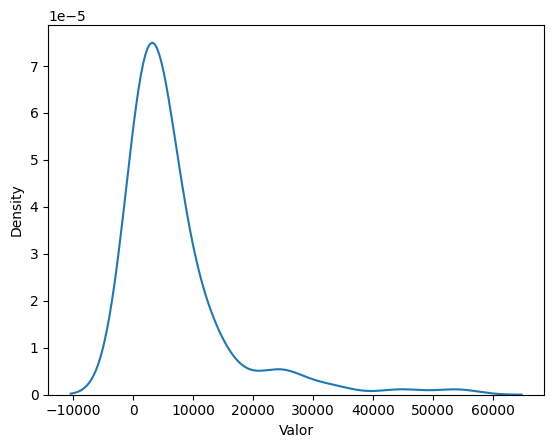

In [215]:
# Avaliando gráfico KDE dos valores em diferentes porções dos dados

sns.kdeplot(data=df[1000:1100], x="Valor")



print("O gráfico aponta uma tendência à direita, possuindo grande concentração nos valores pequenos \n euma grande dispersão nos valores maiores, possuíndo diversos outsiders")

Existem 334 imóveis com valores a cima de: R$100,000.00


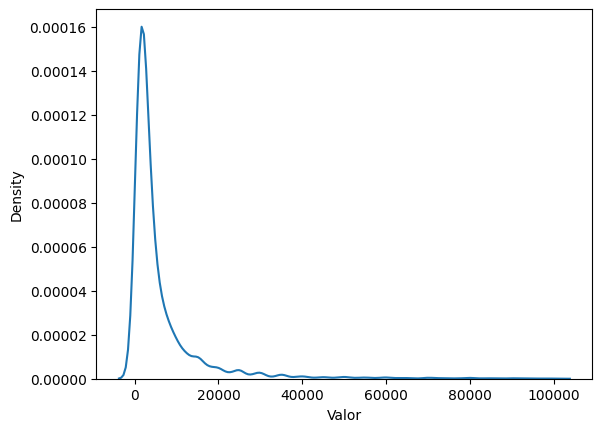

In [216]:
# Definindo valor de outliers a serem ignorados

cort_outliers = 100000
x = (df["Valor"] > cort_outliers).sum()

sns.kdeplot(data=df[df["Valor"] < cort_outliers], x="Valor")


print(f"Existem {x} imóveis com valores a cima de: R${y:,.2f}")

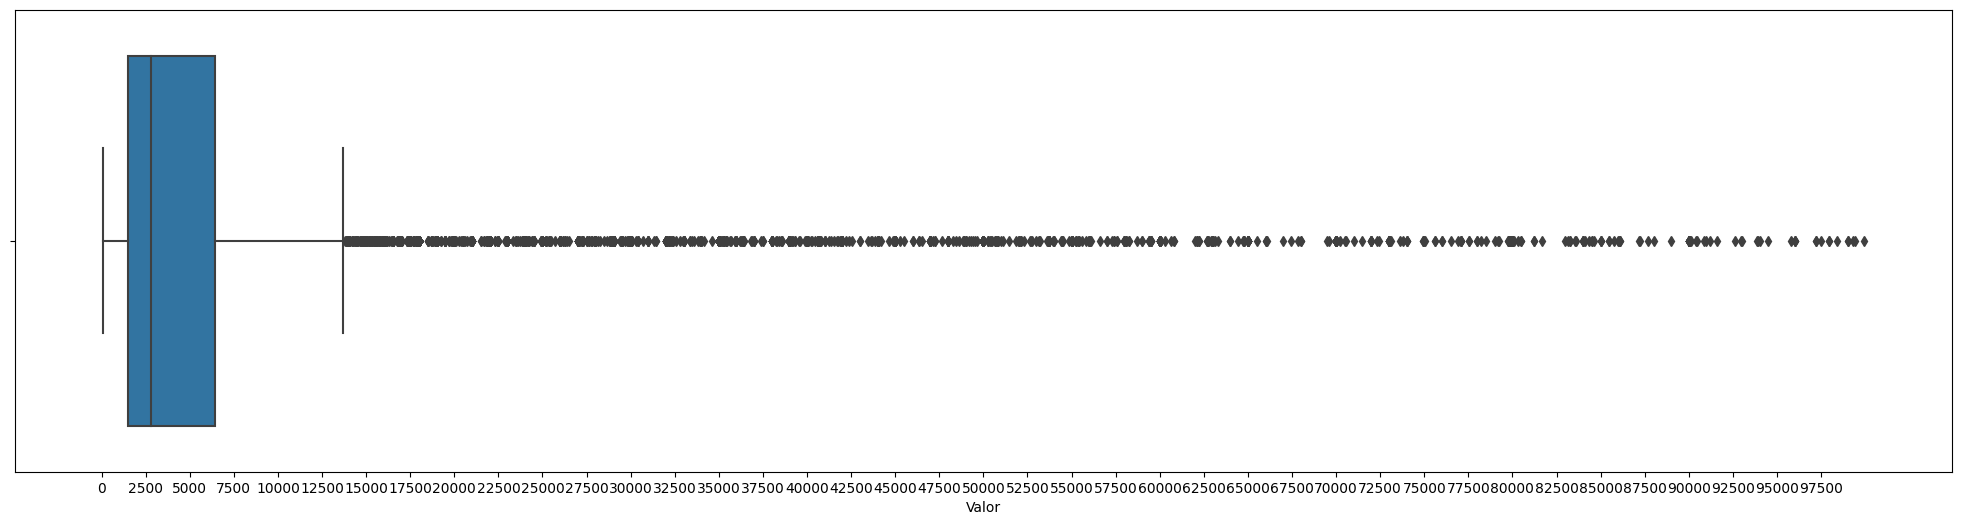

In [217]:
# Box Plot com redução dos outliers para possibilitar visualização

# criando DF sem outsiders (serão excluídos os outsiders que representem imóveis com valores a cima de 100.000,00)
df_sem_outliers = df[df["Valor"] < 100000]

# Plotando Boxplot com redução dos Outsiders
plt.figure(figsize=(25,6))
plt.xticks(np.arange(0,cort_outliers,step=2500))

sns.boxplot(data=df_sem_outliers, x="Valor")

plt.show()

In [218]:
# df[df["Valor"] == df["Valor"].max()]

df[df["Valor"] == df["Valor"]].nlargest(columns="Valor", n=10) #1

#ou

#df[df["Valor"] == df["Valor"]].sort_values(by="Valor", ascending=False).head(10), # 2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN
25632,Prédio Inteiro,Humaitá,0,96,0,8279,1324640.0,165580.0,96889.0
26327,Conjunto Comercial/Sala,Caju,0,0,0,10660,1279200.0,NaN,NaN
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
28047,Prédio Inteiro,Humaitá,0,96,0,8279,1076270.0,NaN,NaN
25775,Prédio Inteiro,Centro,0,0,0,9200,950000.0,NaN,45508.0
8377,Conjunto Comercial/Sala,Centro,0,1,0,40,900700.0,1050.0,120.0
17740,Galpão/Depósito/Armazém,Centro,0,83,0,34677,898134.0,NaN,NaN


criar grafico dos valores categorizados por Tipo de imóvel

In [219]:
df["Tipo"].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

In [ ]:
df_type = df.copy()

Excluíndo tipos que possuem apenas 1 imóvel e portanto não podem ser plotados

In [231]:
tipos_unicos = df_type["Tipo"].unique()

for tipo in tipos_unicos:
    contagem = (df_type["Tipo"] == tipo).sum()
    if contagem < 2:
        df_type.drop(df_type[df_type["Tipo"] == tipo].index, inplace=True)
    else:
        continue


df_type["Tipo"].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Name: Tipo, dtype: int64

In [232]:
print(df_type["Tipo"].value_counts(),
      df["Tipo"].value_counts())

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Name: Tipo, dtype: int64 Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat         

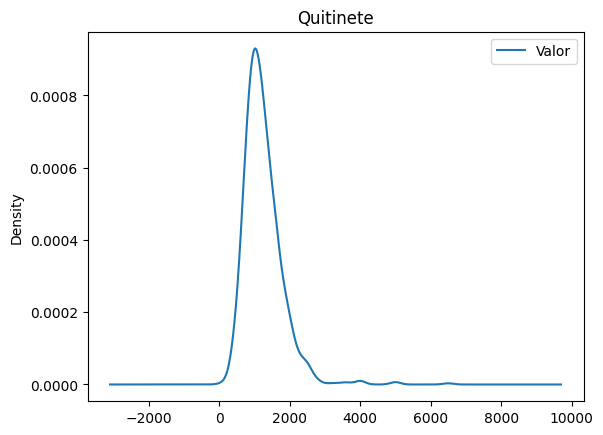

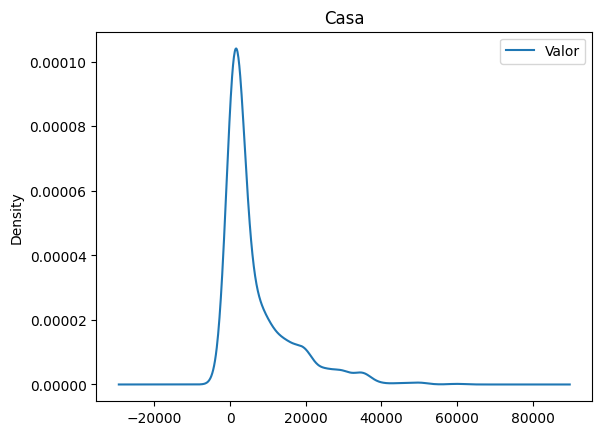

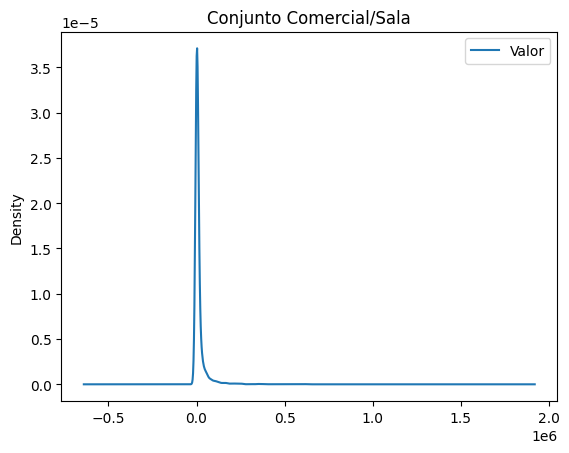

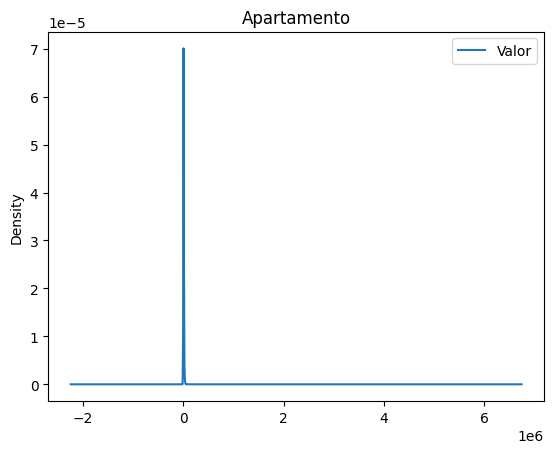

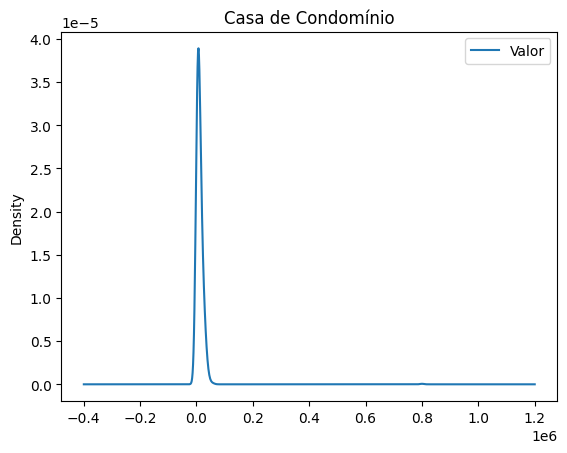

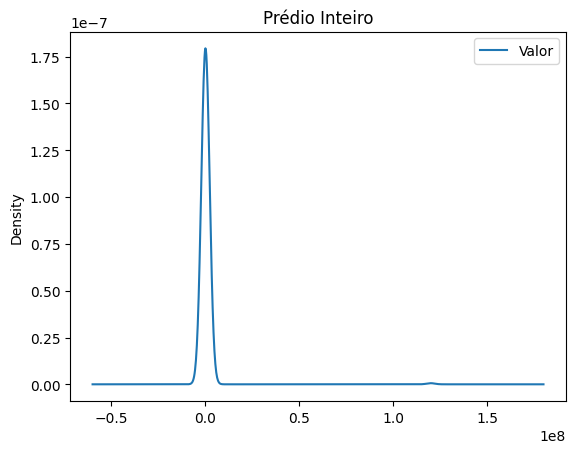

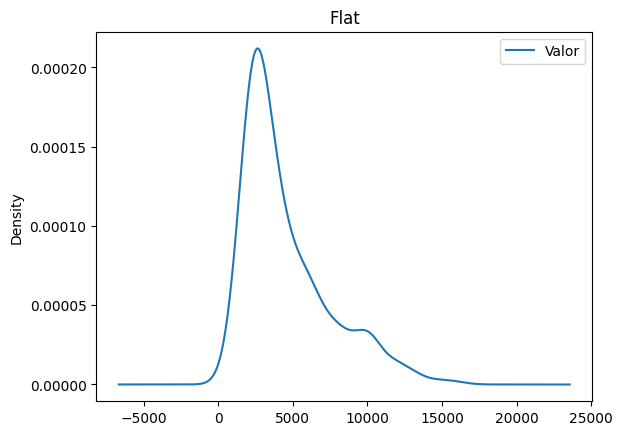

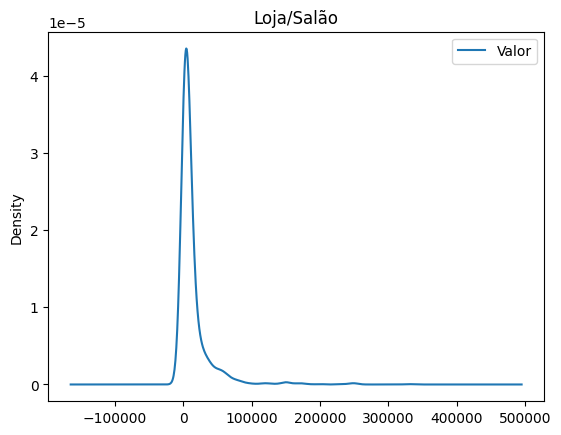

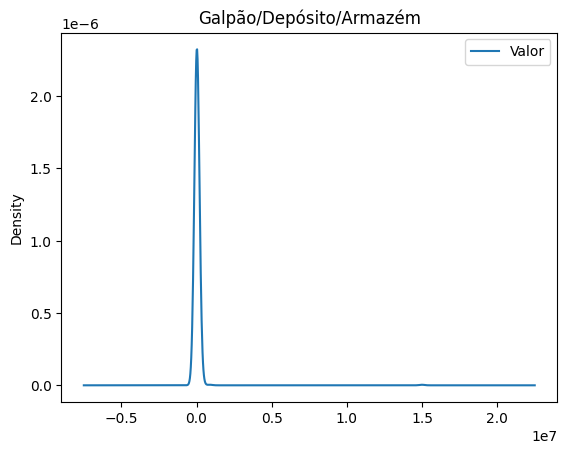

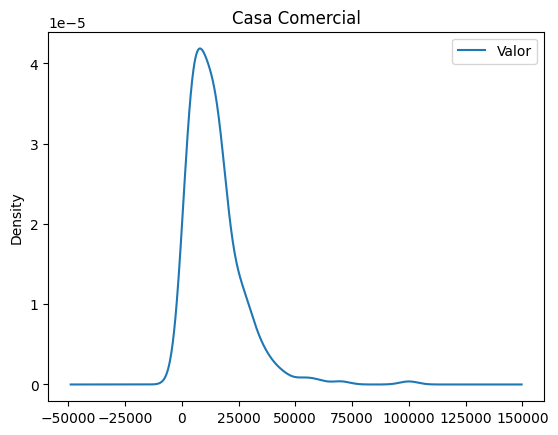

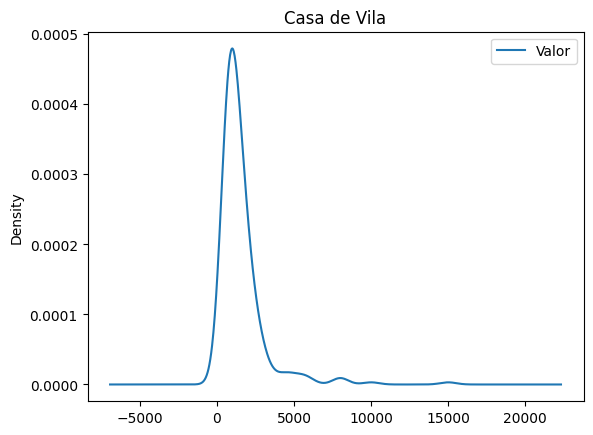

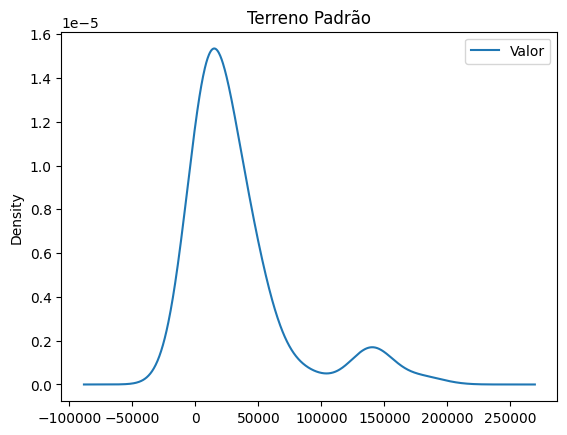

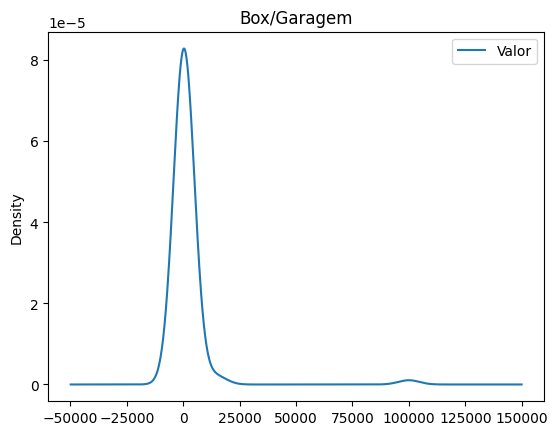

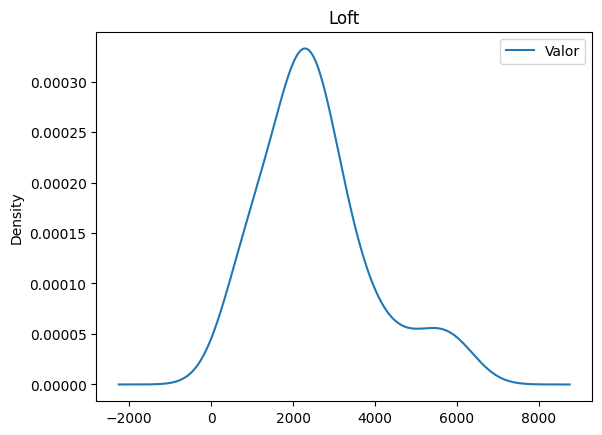

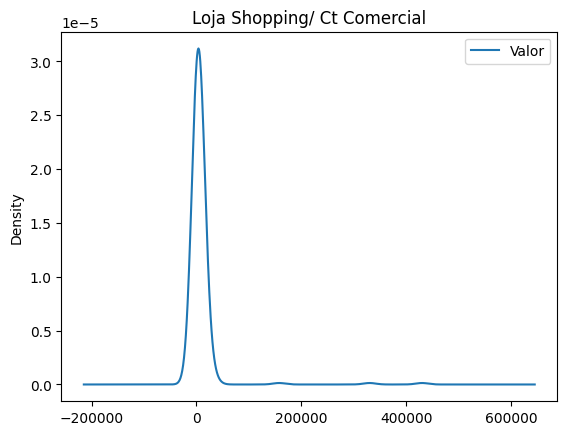

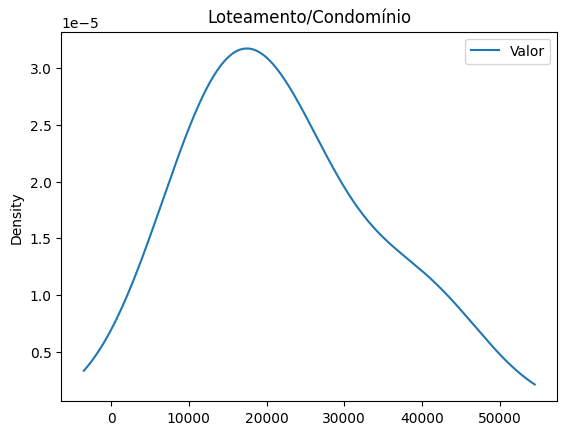

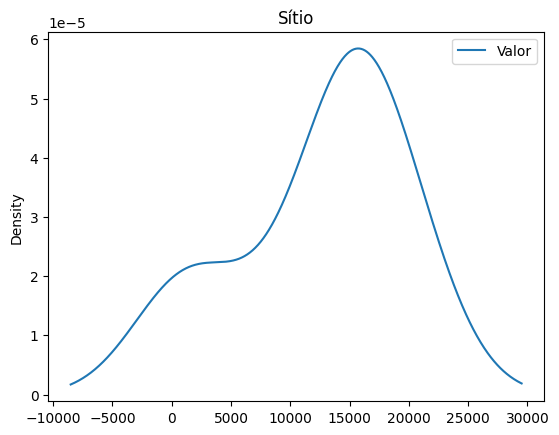

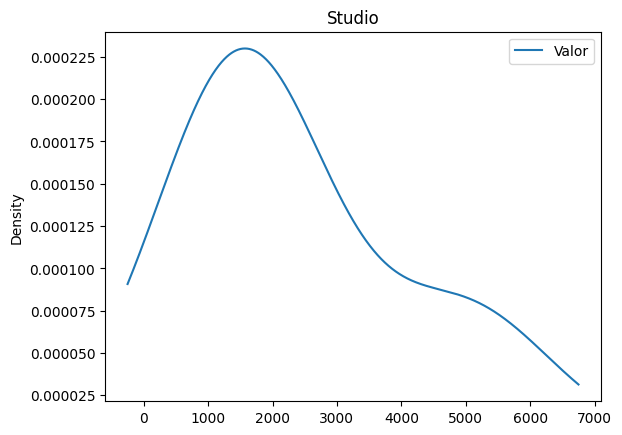

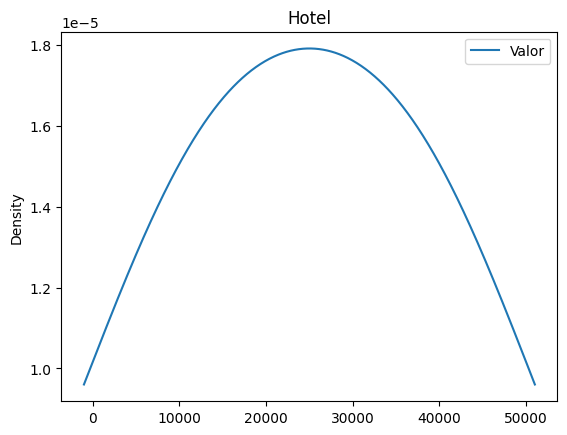

In [233]:
# Plotagem dos gráficos direto com o matplot

tipos = df_type["Tipo"].unique()

for tipo in tipos:
  df_type[df_type["Tipo"] == tipo].plot(y="Valor", title=f"{tipo}", kind="kde")

Subplotar para melhorar visualização

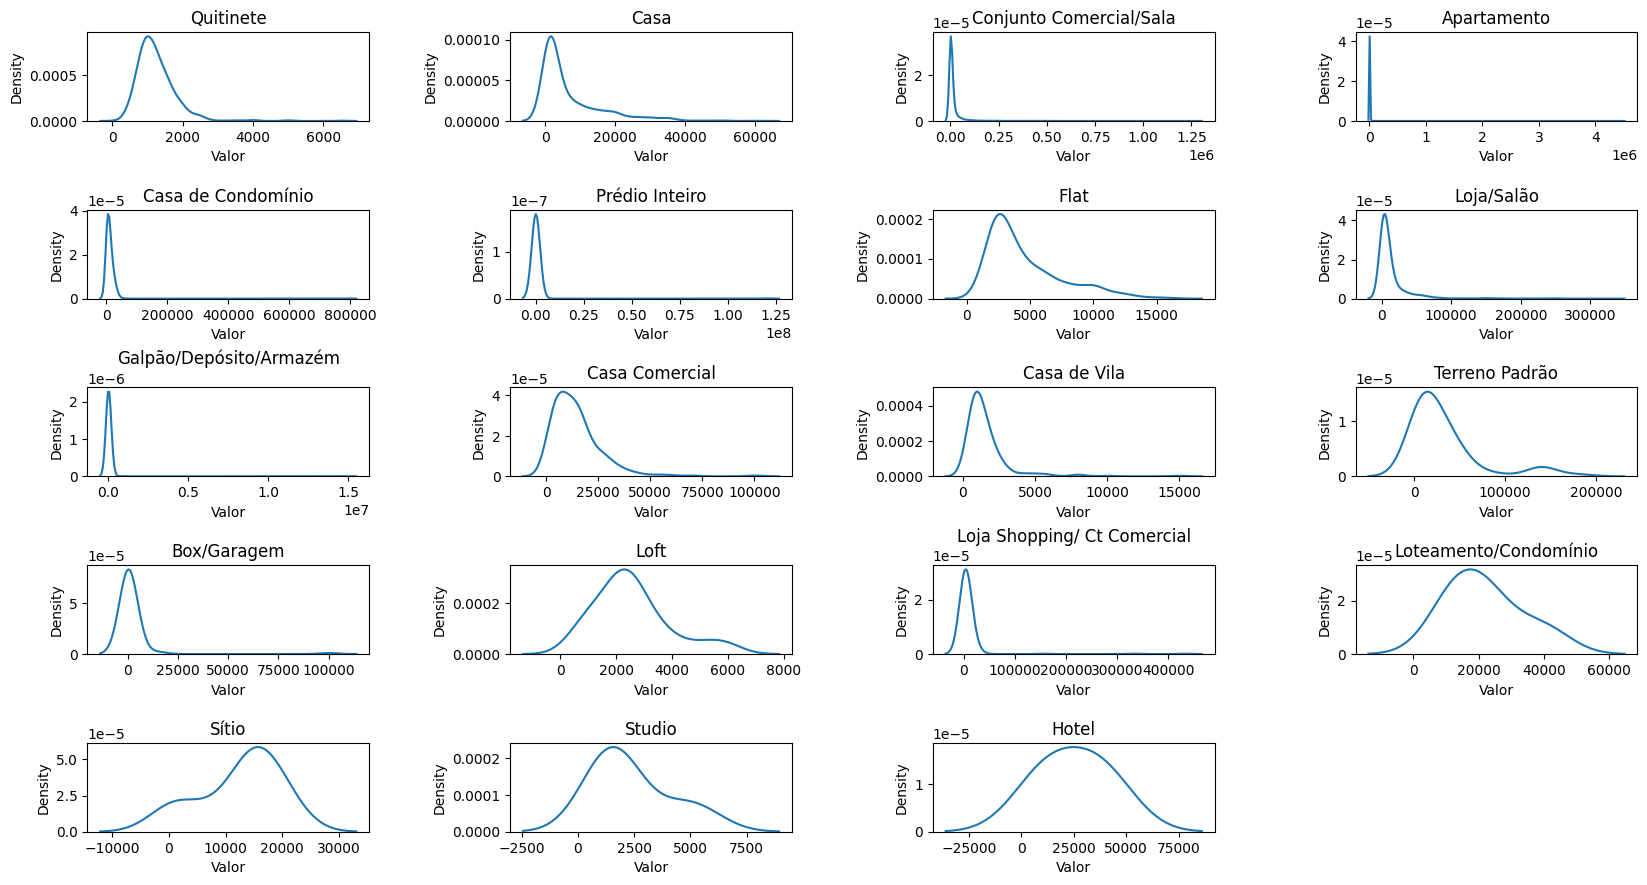

In [234]:
# SubPlot com Seaborn dos valores por tipo


tipos = df_type["Tipo"].unique()

num_linhas = (len(tipos)+2)//3
num_colunas = 4

plt.figure(figsize=(20 ,15))

for i,tipo in enumerate(tipos):
  plt.subplot(num_linhas, num_colunas, i+1)
  plt.subplots_adjust(wspace=0.5, hspace=1)
  sns.kdeplot(data=df_type[df_type["Tipo"] == tipo], x="Valor")
  plt.title(f"{tipo}")

plt.show()

In [235]:
# Desenvolver média dos Valores categorizados por tipo